In [1]:
#### Use this script for stationary and non-stationary data by making the folowing two changes only:
# 1- change name of input file
# 2- change d in ARIMA because it is 0 for stationary and 1 for non-stationary data

In [2]:
#from google.colab import files      # For uploading/downloading files in Google Colab
#print("Please upload your csv file")
#uploaded = files.upload()  # Opens a file upload dialog box in Google Colab

In [3]:
import pandas as pd
import numpy as np  

In [4]:
data = pd.read_csv('stationary_sales_data.csv')

# Show first few rows
print("\n Data successfully loaded! Here's what it looks like:")
display(data.head())


 Data successfully loaded! Here's what it looks like:


,Date,Sales
0,2024-01-01,200.000000
1,2024-01-02,199.308678
2,2024-01-03,202.823650
3,2024-01-04,209.309339
4,2024-01-05,204.414837


In [5]:

# ============================================
# 1. Import libraries for time series analysis and forecasting
# ============================================

import pandas as pd
import matplotlib.pyplot as plt

# Tools from statsmodels for time series
from statsmodels.tsa.seasonal import seasonal_decompose # For trend/seasonal decomposition
from statsmodels.tsa.stattools import adfuller, kpss # For stationarity tests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # For ACF / PACF plots
from statsmodels.tsa.arima.model import ARIMA # For ARMA/ARIMA models

# Make plots a bit bigger so they’re easier to read
plt.rcParams["figure.figsize"] = (10, 4)

In [6]:
# ============================================
# 2. Load data and set Date as index
# ============================================

# Read the CSV
df = pd.read_csv("stationary_sales_data.csv", parse_dates=["Date"])  # parse_dates makes "Date" into datetime objects
df.set_index("Date", inplace=True) # set the Date column as the index (x-axis)

print("\nFirst few rows of the data:")
print(df.head()) # just to quickly see what the data looks like

# Tell pandas this is daily data (important for some time series methods)
df = df.asfreq("D")  # "D" = daily frequency


First few rows of the data:
                 Sales
Date                  
2024-01-01  200.000000
2024-01-02  199.308678
2024-01-03  202.823650
2024-01-04  209.309339
2024-01-05  204.414837


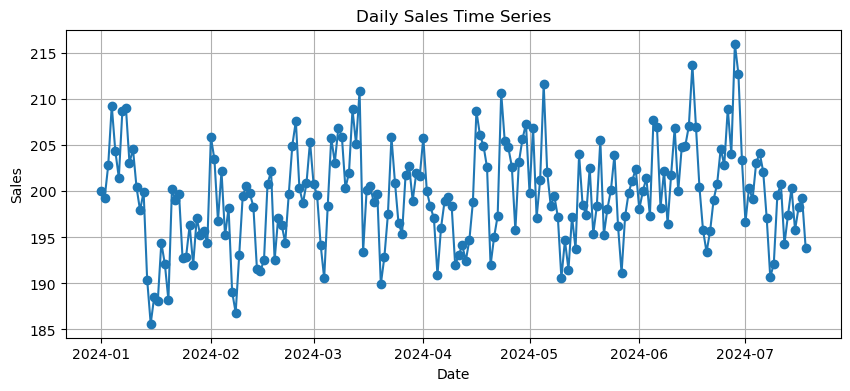

In [7]:
# ============================================
# 3. Plot the original time series (Visualization)
# ============================================

plt.figure()
plt.plot(df.index, df["Sales"], marker="o")
plt.title("Daily Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
# ➜ This plot helps you visually see if sales are going up, down, or wiggling around.


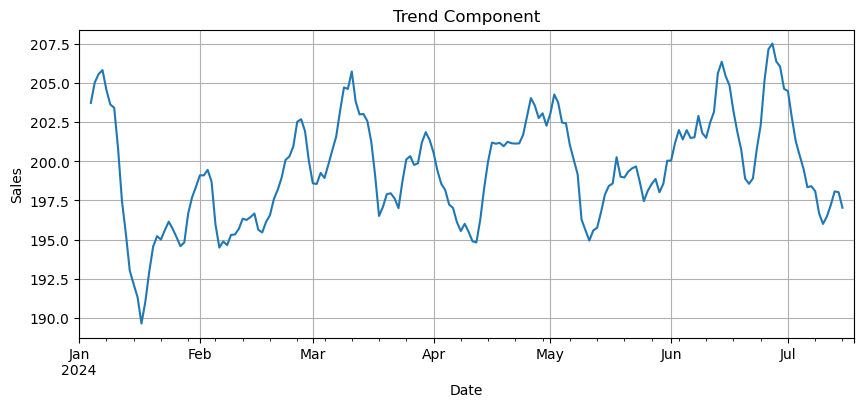

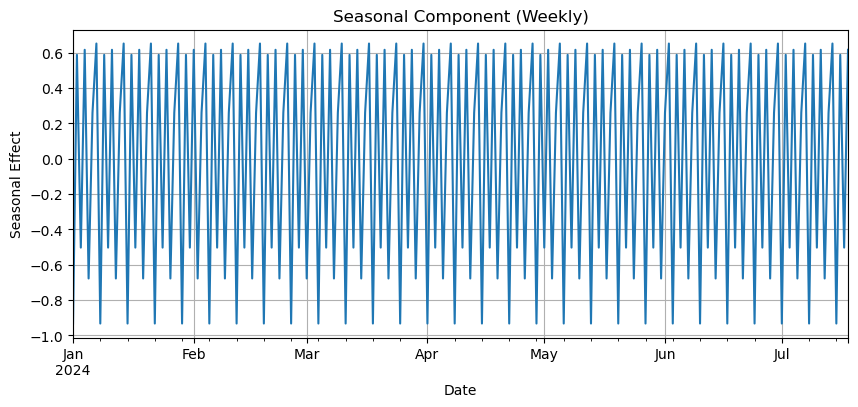

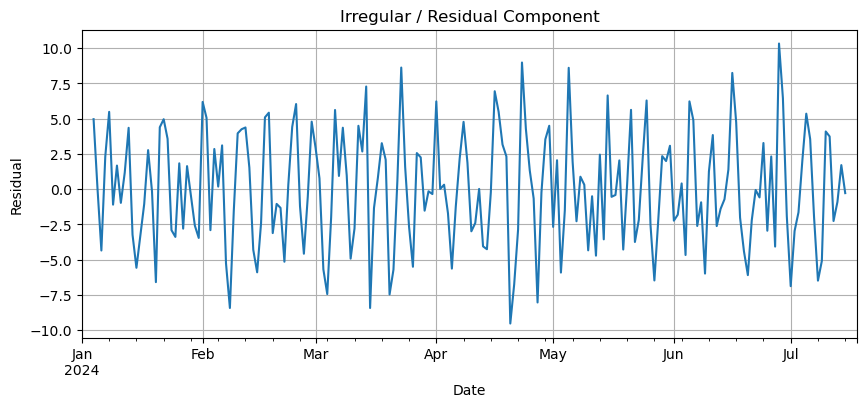

In [8]:
# ============================================
# 4. Trend, Seasonality, Irregularity (Decomposition)
# ============================================

# We assume sales might have a weekly pattern (period = 7 days).
# "additive" means: data = trend + seasonal + noise
result = seasonal_decompose(df["Sales"], model="additive", period=7)

# Trend component: slow, long-term movement
plt.figure()
result.trend.plot()
plt.title("Trend Component")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Seasonal component: repeating pattern every 7 days
plt.figure()
result.seasonal.plot()
plt.title("Seasonal Component (Weekly)")
plt.ylabel("Seasonal Effect")
plt.grid(True)
plt.show()

# Residual/Irregular: leftover noise after removing trend + seasonality
plt.figure()
result.resid.plot()
plt.title("Irregular / Residual Component")
plt.ylabel("Residual")
plt.grid(True)
plt.show()


#Note: Longer cycles (business cycles) are often mixed into the trend.

In [9]:
# ============================================
# 5. Stationarity Tests: ADF and KPSS
# ============================================

# Stationary = mean and variance don't change over time.
# Many time series models (like ARIMA) prefer stationary data.

series = df["Sales"].dropna()  # drop missing values just in case

# ----- ADF Test (Augmented Dickey-Fuller) -----
# H0 (null hypothesis): Series is NON-STATIONARY.
adf_result = adfuller(series)
print(f"p-value: {adf_result[1]:.4f}")

p-value: 0.0000


<Figure size 1000x400 with 0 Axes>

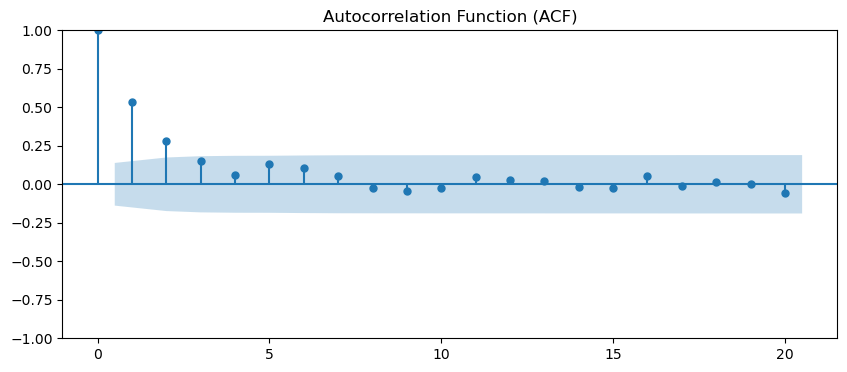

<Figure size 1000x400 with 0 Axes>

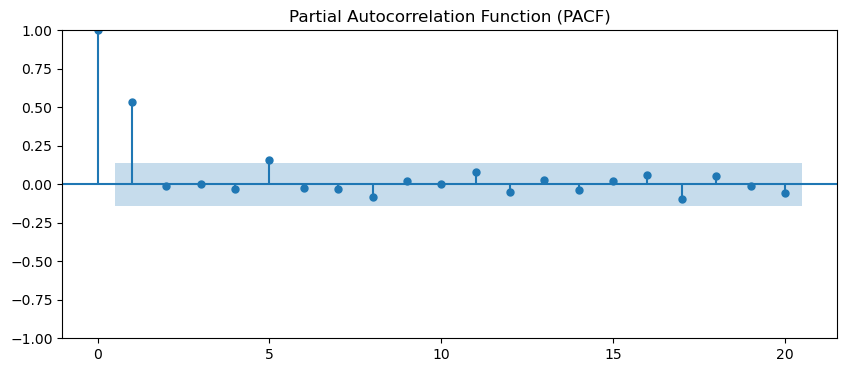

In [10]:
# ============================================
# 6. ACF and PACF plots (to inspect correlation structure)
# ============================================

# ACF = how each value is related to previous values (lags).
# PACF = direct relationship with past lags after removing effects of intermediate lags.

plt.figure()
plot_acf(series, lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure()
plot_pacf(series, lags=20, method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()
# ➜ These help you choose AR and MA orders (p and q) in ARMA/ARIMA,
#   but at beginner level, just seeing “how quickly correlation dies out” is enough.

In [11]:
# ============================================
# 7. Train/Test Split for Modeling
# ============================================

# We split the data to:
# - Train the model on past data.
# - Test it on later data (to see how well it predicts unseen values).

split_index = int(len(series) * 0.8)  # 80% train, 20% test
train = series[:split_index]
test = series[split_index:]

print("\nTrain length:", len(train))
print("Test length :", len(test))


Train length: 160
Test length : 40


In [12]:
# ============================================
# 8. ARIMA Model (allowing differencing, d > 0 for non-stationary data)
# ============================================

# ARIMA(p, d, q):
# - p = number of AR (AutoRegressive) terms
# - d = number of times we difference the data to remove trend
# - q = number of MA (Moving Average) terms
#
# For non-stationary data use: ARIMA(1,1,1) → 1 AR term, 1 differencing, 1 MA term
# For stationary data use: ARIMA(1,0,1) → 1 AR term, 0 differencing, 1 MA term

arima_order = (1, 0, 1) # change this line based on stationarity of data
arima_model = ARIMA(train, order=arima_order)
arima_result = arima_model.fit()

print(arima_result.summary())

# Use AIC (for model comparison)
#'coef' values are learned parameters.
# We mainly care that the model runs and can forecast.

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  160
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -472.536
Date:                Thu, 13 Nov 2025   AIC                            953.071
Time:                        18:08:35   BIC                            965.372
Sample:                    01-01-2024   HQIC                           958.066
                         - 06-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.1203      0.736    270.470      0.000     197.677     200.563
ar.L1          0.5007      0.154      3.254      0.001       0.199       0.802
ma.L1          0.0001      0.183      0.001      0.9

c:\Users\MuriloFarias\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


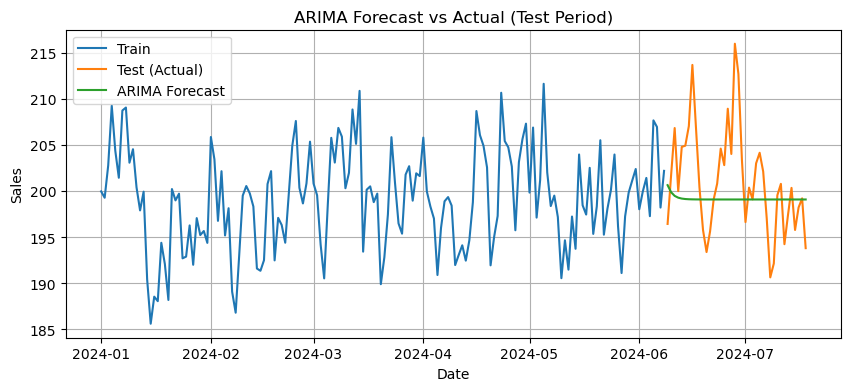

In [13]:
# ============================================
# 9. Forecasting with ARIMA (on test period)
# ============================================

# We forecast the same number of points as we have in the test set.
start = len(train)
end = len(train) + len(test) - 1

# typ='levels' gives predictions on the original scale (not differenced)
arima_forecast = arima_result.predict(start=start, end=end, typ="levels")

# Make sure the indexes match the test data for plotting
arima_forecast.index = test.index

plt.figure()
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast")
plt.title("ARIMA Forecast vs Actual (Test Period)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()



Next 14-day forecasted values:
2024-06-09    200.676705
2024-06-10    199.899633
2024-06-11    199.510529
2024-06-12    199.315693
2024-06-13    199.218133
2024-06-14    199.169282
2024-06-15    199.144820
2024-06-16    199.132572
2024-06-17    199.126439
2024-06-18    199.123368
2024-06-19    199.121830
2024-06-20    199.121060
2024-06-21    199.120674
2024-06-22    199.120481
Freq: D, Name: predicted_mean, dtype: float64


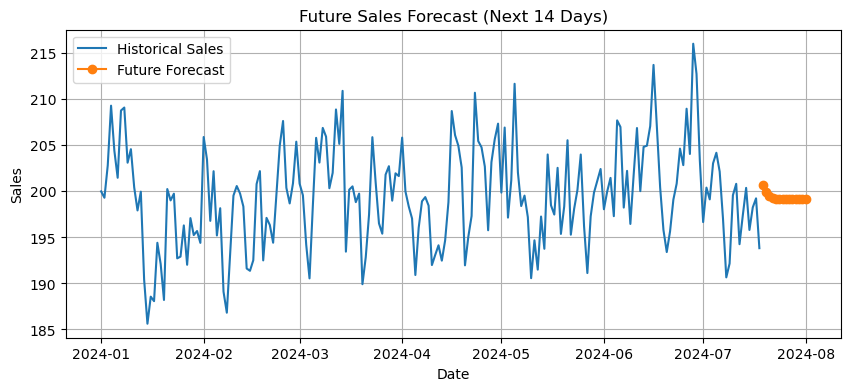

In [14]:
# ============================================
# 10. Forecasting future values beyond the dataset
# ============================================

# Let's forecast the next 14 days after the end of the series.
n_steps = 14
future_forecast = arima_result.forecast(steps=n_steps)

print("\nNext 14-day forecasted values:")
print(future_forecast)

# Create an index (dates) for the future forecast
future_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1),
                             periods=n_steps, freq="D")

plt.figure()
plt.plot(series.index, series, label="Historical Sales")
plt.plot(future_index, future_forecast, marker="o", label="Future Forecast")
plt.title("Future Sales Forecast (Next 14 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

